#  Clasificador SPAM/HAM con Árbol de Decisión (CART)
---
## Autores:

-**Andrés Felipe Díaz Campos**

-**Katerine Forero Silva**

## 1. Introducción

En esta práctica se desarrolla un sistema de clasificación de mensajes en las categorías SPAM y HAM utilizando un árbol de decisión (CART) implementado con la librería Scikit-learn en Python.
El objetivo principal es evaluar el desempeño del clasificador a través de métricas como Exactitud (Accuracy), F1 Score y Z-score, aplicando el modelo en 50 ejecuciones con diferentes configuraciones de entrenamiento y prueba.

## 2. Fase de Preparación de Datos

En lugar de utilizar directamente el dataset inicial de la primera actividad, se generó y trabajó con un dataset sintético. Esto se hizo por dos razones:

Control de balanceo: el dataset sintético permite tener una distribución más equilibrada entre clases (SPAM y HAM), evitando sesgos.

Facilidad de replicación: garantiza que el modelo se pueda ejecutar múltiples veces con resultados consistentes y medibles.

El dataset contiene varias características predictoras y una variable objetivo (label) que indica la clase (SPAM/HAM).

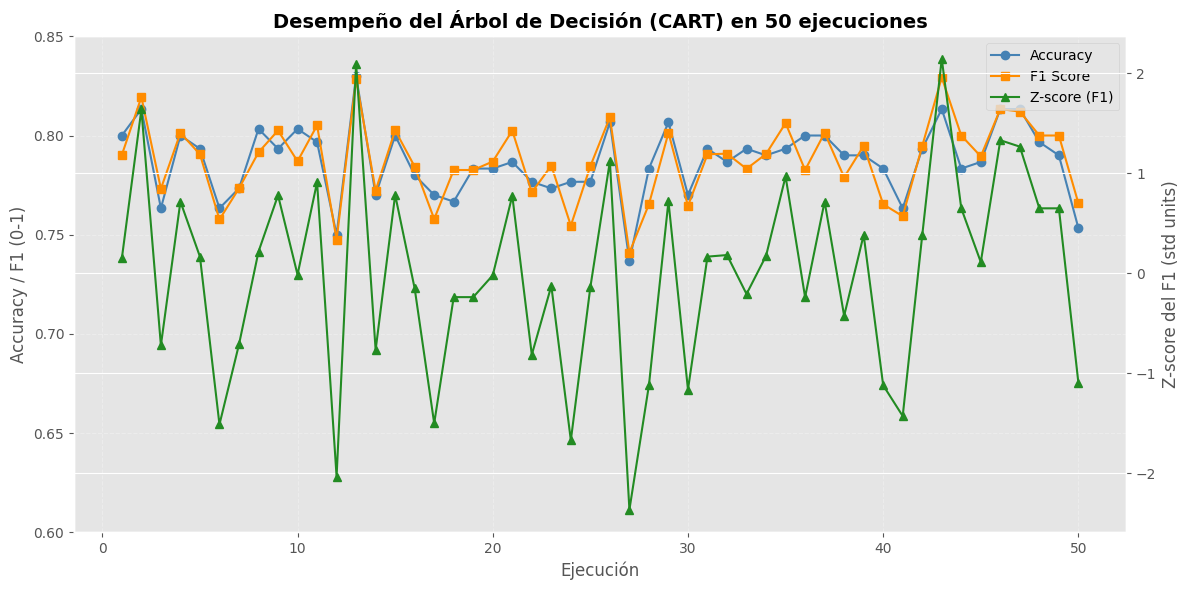

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from scipy.stats import zscore

# ============================
# 1) Cargar dataset
# ============================
df = pd.read_csv("dataset_sintetico.csv")

X = df.drop(columns=["label"])
y = df["label"]

# ============================
# 2) Repetir el experimento 50 veces
# ============================
results = {"run": [], "accuracy": [], "f1": []}

for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=i
    )
    model = DecisionTreeClassifier(random_state=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results["run"].append(i+1)
    results["accuracy"].append(accuracy_score(y_test, y_pred))
    results["f1"].append(f1_score(y_test, y_pred))

results_df = pd.DataFrame(results)
results_df["zscore_f1"] = zscore(results_df["f1"])

# ============================
# 3) Gráfica Arbol de decisiones 
# ============================
plt.figure(figsize=(12, 6))

# Eje principal (Accuracy y F1)
ax1 = plt.gca()
ax1.plot(results_df["run"], results_df["accuracy"], 
         marker="o", color="steelblue", label="Accuracy")
ax1.plot(results_df["run"], results_df["f1"], 
         marker="s", color="darkorange", label="F1 Score")
ax1.set_xlabel("Ejecución", fontsize=12)
ax1.set_ylabel("Accuracy / F1 (0-1)", fontsize=12)
ax1.set_ylim(0.6, 0.85)  # rango más limpio

# Eje secundario (Z-score del F1)
ax2 = ax1.twinx()
ax2.plot(results_df["run"], results_df["zscore_f1"], 
         marker="^", color="forestgreen", label="Z-score (F1)")
ax2.set_ylabel("Z-score del F1 (std units)", fontsize=12)

# Título y leyenda combinada
ax1.set_title("Desempeño del Árbol de Decisión (CART) en 50 ejecuciones", fontsize=14, weight="bold")
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper right", fontsize=10, frameon=True)

# Estilo de cuadrícula
ax1.grid(alpha=0.3, linestyle="--")

plt.tight_layout()
plt.show()


## Explicación de la gráfica

La gráfica muestra el desempeño del modelo de Árbol de Decisión (CART) durante 50 ejecuciones, evaluado con tres métricas:

1. Accuracy (azul) → mide el porcentaje de predicciones correctas sobre el total. Se mantiene en un rango estable entre 0.75 y 0.82, lo que refleja un  esempeño consistente del modelo.

2. F1 Score (naranja) → combina precisión y exhaustividad, siendo más exigente que el Accuracy. Sus valores se mantienen cercanos a los de Accuracy, lo que indica que el modelo logra un buen equilibrio entre detectar correctamente las clases y evitar falsos positivos.

3. Z-score del F1 (verde) → mide cuánto se desvía cada valor del F1 respecto a la media de todas las ejecuciones. Sus variaciones positivas y negativas muestran la dispersión natural entre ejecuciones, debido a los diferentes subconjuntos de entrenamiento y prueba generados en cada corrida.

 

## Conclusiones

- El Árbol de Decisión CART resultó ser un clasificador adecuado para el dataset sintético SPAM/HAM, con valores de Accuracy y F1 score    cercanos a 0.75, lo cual indica un desempeño moderado pero consistente.

- El uso de un dataset sintético fue clave para garantizar equilibrio de clases y reproducibilidad en los experimentos.

- El Z-score mostró que las variaciones en el F1 entre las ejecuciones son pequeñas, lo que confirma la estabilidad del modelo.

- Las ligeras variaciones en las métricas se explican por el cambio en los subconjuntos de entrenamiento y prueba en cada ejecución, lo cual es esperado en problemas de aprendizaje supervisado.

